# 課題6: ディープラーニング

今回の課題では手書き文字の認識をCNNを用いて行います。

下記にKerasから手書き文字のデータセットをダウンロードするコードが記載されています。

このデータを用いてディープラーニングのモデルを構築してください。

今までのレッスンで学んだ内容を踏まえ、各セルに'#コメント'の内容を実行するコードを記入してください。

※既にソースコードが記載されているセルは変更不要です。

## 1. ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# データの分割
from sklearn.model_selection import train_test_split

# 手書き数字のデータセット
from tensorflow.keras.datasets import mnist

# JupyterNotebook上でグラフを表示する設定
%matplotlib inline
# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

## 2. データの読込
Kerasのデータセットは予めTraining setとTest setに分けられています。戻り値はタプルで取得できます。

In [2]:
# Kerasに添付されている手書き数字のデータセットをダウンロード
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

## 3.データの確認

In [3]:
# 形状の確認
print("X_train=", X_train.shape, ", Y_train=", Y_train.shape)
print("X_test =", X_test.shape, ", Y_test =", Y_test.shape)



X_train= (60000, 28, 28) , Y_train= (60000,)
X_test = (10000, 28, 28) , Y_test = (10000,)


In [4]:
# X_trainの先頭1行を表示
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# Y_trainの先頭1行を表示
Y_train[0]

5

### 手書き数字の可視化

In [6]:
# 「数字:空のリスト」の辞書を作成する
images = {label: [] for label in range(0,10)}

In [7]:
# 総イメージ数
image_count = 0

# それぞれの数字のリストに、説明変数をappendしていく
for i in range(0, len(X_train)):
    if len(images[Y_train[i]]) < 10:
        images[Y_train[i]].append(X_train[i])
        image_count += 1
        if image_count == 100:
            break

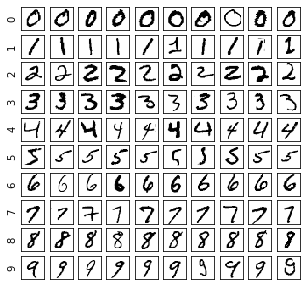

In [8]:
# 少し時間がかかります。
# 10行10列にグラフを分割
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

for i in range(10):
    # ラベル
    ax[i, 0].set_ylabel(i)

    for j in range(10):
        # zは左上から数えたグラフの描画位置
        z = i * 10 + j

        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(images[i][j].reshape(28, 28), cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

## 4. データの前処理

In [9]:
# 形状の確認
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
# len関数を使い、X_trainを(X_trainの長さ, 28, 28, 1)にreshapeしてX_train2に代入
X_train2 = X_train.reshape(len(X_train), 28, 28, 1)

# len関数を使い、X_testを(X_testの長さ, 28, 28, 1)にreshapeしてX_test2に代入
X_test2 = X_test.reshape(len(X_test), 28, 28, 1)


In [11]:
# to_categoricalを使い、Y_trainをカテゴリー変数に展開してY_train2に代入
Y_train2 = to_categorical(Y_train)
# to_categoricalを使い、Y_testをカテゴリー変数に展開してY_test2に代入
Y_test2 = to_categorical(Y_test)


In [12]:
# 形状の確認
print("X_train2=", X_train2.shape, "Y_train2=", Y_train2.shape)
print("X_test2 =", X_test2.shape, "Y_test2=", Y_test2.shape)



X_train2= (60000, 28, 28, 1) Y_train2= (60000, 10)
X_test2 = (10000, 28, 28, 1) Y_test2= (10000, 10)


In [13]:
# train_test_splitを使いデータを7:3に分割
# 機械学習用データ(X_train2、Y_train2)を「X_train2, X_valid2, Y_train2, Y_valid2」に分割
X_train2, X_valid2, Y_train2, Y_valid2 = train_test_split(X_train2, Y_train2, test_size=0.3, random_state=0)


In [14]:
# データ(学習、検証、テスト)の形状を確認
print("X_train2=", X_train2.shape, "Y_train2=", Y_train2.shape)
print("X_valid2=", X_valid2.shape, "Y_valid2=", Y_valid2.shape)


X_train2= (42000, 28, 28, 1) Y_train2= (42000, 10)
X_valid2= (18000, 28, 28, 1) Y_valid2= (18000, 10)


## 5. モデルの構築

Kerasを使ってモデルを構築してみましょう。以下を条件とします

- CNN(Conv2D)を使うこと
- 正解率(accuracy)が50%以上であること

場合によっては、学習にものすごく時間がかかる場合もあります。適宜パラメータ数を調整して行ってください

In [15]:
# ライブラリのインポート
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [16]:
# モデルの初期化
model = keras.Sequential()

# ここにモデルを構築するコードを記述してください
# 入力層
model.add(Conv2D(32, kernel_size=3, padding="same", strides=1,
                 input_shape=(28, 28, 1,), activation="relu"))
model.add(Flatten())
# 隠れ層
model.add(Dense(16, activation="relu"))
# 出力層
model.add(Dense(10, activation="softmax"))

# モデルの構築
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])


In [17]:
# モデルの構造を表示
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                401424    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 401,914
Trainable params: 401,914
Non-trainable params: 0
_________________________________________________________________


In [18]:
%%time
# 学習を実施し、結果をlogで受け取る。EarlyStoppingを使用する
log = model.fit(X_train2, Y_train2, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
                validation_data=(X_valid2, Y_valid2))

Train on 42000 samples, validate on 18000 samples
Epoch 1/5000
42000/42000 [==============================] - 29s 681us/sample - loss: 1.9875 - accuracy: 0.4573 - val_loss: 0.5590 - val_accuracy: 0.8653
Epoch 2/5000
42000/42000 [==============================] - 27s 642us/sample - loss: 0.2131 - accuracy: 0.9470 - val_loss: 0.1355 - val_accuracy: 0.9610
Epoch 3/5000
42000/42000 [==============================] - 28s 656us/sample - loss: 0.0898 - accuracy: 0.9758 - val_loss: 0.1089 - val_accuracy: 0.9713
Epoch 4/5000
42000/42000 [==============================] - 27s 644us/sample - loss: 0.0633 - accuracy: 0.9829 - val_loss: 0.1263 - val_accuracy: 0.9698
Epoch 5/5000
42000/42000 [==============================] - 27s 647us/sample - loss: 0.0504 - accuracy: 0.9869 - val_loss: 0.1262 - val_accuracy: 0.9733
Epoch 6/5000
42000/42000 [==============================] - 27s 652us/sample - loss: 0.0373 - accuracy: 0.9910 - val_loss: 0.1539 - val_accuracy: 0.9732
Epoch 7/5000
42000/42000 [======

Epoch 54/5000
42000/42000 [==============================] - 27s 651us/sample - loss: 0.0018 - accuracy: 0.9999 - val_loss: 1.1579 - val_accuracy: 0.9752
Epoch 55/5000
42000/42000 [==============================] - 27s 648us/sample - loss: 4.9455e-04 - accuracy: 0.9999 - val_loss: 1.1466 - val_accuracy: 0.9740
Epoch 56/5000
42000/42000 [==============================] - 27s 651us/sample - loss: 5.1559e-05 - accuracy: 1.0000 - val_loss: 1.1791 - val_accuracy: 0.9748
Epoch 57/5000
42000/42000 [==============================] - 27s 646us/sample - loss: 0.0019 - accuracy: 0.9998 - val_loss: 1.0855 - val_accuracy: 0.9752
Epoch 58/5000
42000/42000 [==============================] - 27s 651us/sample - loss: 7.3248e-04 - accuracy: 0.9999 - val_loss: 1.1099 - val_accuracy: 0.9753
Epoch 59/5000
42000/42000 [==============================] - 27s 644us/sample - loss: 3.3477e-06 - accuracy: 1.0000 - val_loss: 1.1269 - val_accuracy: 0.9757
Epoch 60/5000
42000/42000 [==============================] -

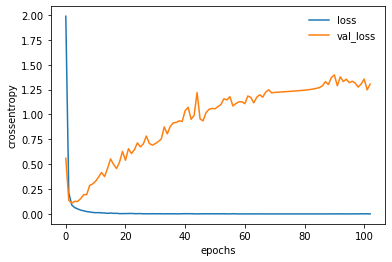

In [24]:
# 学習の課程をグラフで表示する
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel('epochs')
plt.ylabel('crossentropy')
plt.show()

## 6. テストデータによる評価

In [25]:
# 環境により、そのままX_test2を使うとエラーになる対策(float型に変換)
X_test2 = X_test2 * 1.0

In [26]:
# predict_classesを使い、X_test2をもとに予測した結果をY_pred2に代入
Y_pred2 = model.predict_classes(X_test2)


In [27]:
# カテゴリー変数Y_test2を復元してY_test2_に代入
Y_test2_ = np.argmax(Y_test2, axis=1)


In [28]:
# classification_reportを使い、モデルの評価を実施
from sklearn.metrics import classification_report

print(classification_report(Y_test2_, Y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

